20180634_최준혁_과제1번

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa import stattools
import pandas_datareader as wb
import datetime

Using Python, perform the following for the KOSPI index returns during the
period 2021:01:02-2021:12:30 (on the basis of daily, closing prices; data available
at https://ecos.bok.or.kr/áex/EasySearch.jsp).

In [2]:
s = datetime.datetime(2021,1,2)
e = datetime.datetime(2021,12,30)
data = wb.DataReader("^KS11",'yahoo',s,e)
df = data['Close'].dropna()

In [3]:
df #2021년 장이 1월 4일(월)에 열림

Date
2021-01-04    2944.449951
2021-01-05    2990.570068
2021-01-06    2968.209961
2021-01-07    3031.679932
2021-01-08    3152.179932
                 ...     
2021-12-24    3012.429932
2021-12-27    2999.550049
2021-12-28    3020.239990
2021-12-29    2993.290039
2021-12-30    2977.649902
Name: Close, Length: 248, dtype: float64

Plot the sample autocorrelation function of the simple returns of the KOSPI index (log-differences of the index). <br>
Do they indicate serial correlation?

In [1]:
log_return = []
for j in range(len(df)):
    if j == 0 : continue
    else : log_return.append(np.log(df[j])-np.log(df[j-1])) #log difference
log_return

NameError: name 'df' is not defined

C:\Users\chris\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


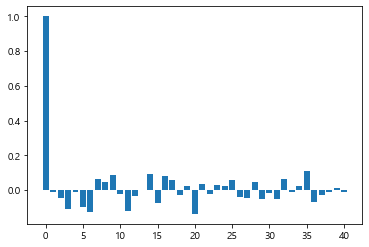

In [5]:
n_lags=40
atcf_qs=stattools.acf(log_return, nlags=n_lags,qstat=True)
  # atcf_qs[0]: values of ACF
  # atcf_qs[1]: values of q-stat
  # atcf_qs[2]: p-values of the q-stat
plt.bar(range(n_lags+1),atcf_qs[0])
plt.show()

ans : 그래프만 보았을 경우 serial correlation은 보이지 않는다

Test the null of no serial correlation using the Ljung-Box test at the 5%
level. Set the lag length at 10.

In [6]:
n_lags=10
atcf_qs=stattools.acf(log_return, nlags=n_lags,qstat=True)
  # atcf_qs[0]: values of ACF
  # atcf_qs[1]: values of q-stat
  # atcf_qs[2]: p-values of the q-stat
atcf_qs[2]

array([0.86485348, 0.74425573, 0.29790866, 0.44831887, 0.29011251,
       0.11701053, 0.13144568, 0.16511785, 0.13191549, 0.1793381 ])

ans : p-value가 전부 0.05보다 높으므로 5% 유의수준에서 Ljung-Box test에서 귀무가설을 기각하지 못한다(no serial corr)